In [20]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

https://noteable.edina.ac.uk/user/sydovg2nqqfsazpsnqw6bm/tree?token=wfU7QcdxSMCGXGwn6sti6A


In [1]:
# import cell
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset into dataframe
spotify_data = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2021-2022/spotify/data.csv.zip')
spotify_data

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [3]:
# -------- initial data exploration --------
column_names = spotify_data.columns
column_names

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

In [4]:
# a dictionary of initial unique values in each column (column name: unique values)
columns_unique_dict = {}
for name in column_names:
    columns_unique_dict[name] = spotify_data[name].unique()
columns_unique_dict

{'Position': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 1

In [5]:
# -------- data cleaning & processing --------
# remove the URL column - no use for it, excessive data
n_spotify_data = spotify_data.drop(columns=["URL"])

# since we have a question to investigate which day of the week and month there are more streams, we add "Day Of Week" and "Day Of Month"
n_spotify_data["Day Of Month"] = n_spotify_data["Date"].transform(lambda date: int(date[-2:]))
n_spotify_data["Day Of Week"] = n_spotify_data["Date"].transform(lambda date: datetime.strptime(date,'%Y-%m-%d').weekday())

In [6]:
n_spotify_data

,Position,Track Name,Artist,Streams,Date,Region,Day Of Month,Day Of Week
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,1,6
1,2,Chantaje,Shakira,19270,2017-01-01,ec,1,6
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec,1,6
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec,1,6
4,5,Safari,J Balvin,14269,2017-01-01,ec,1,6
...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,2018-01-09,hk,9,1
3441193,197,Issues,Julia Michaels,2117,2018-01-09,hk,9,1
3441194,198,Tuo Fei Lun,Eason Chan,2112,2018-01-09,hk,9,1
3441195,199,面具,Alfred Hui,2102,2018-01-09,hk,9,1


In [7]:
# convert unique region values to a df of columns Index and numbers
region_index_df = pd.Series(columns_unique_dict["Region"]).to_frame().reset_index()

# visualise
# | Index | Region |
# |   0   |   ec   |
# |   1   |   fr   | ...etc.

# replace region names with unique indices for regions
logreg_data = n_spotify_data.merge(region_index_df, left_on="Region", right_on=0, how="left")
logreg_data = logreg_data.drop(columns=[0])  # drop the extra column

# turn date into "number of days from 2017-01-01"
first_date_str = spotify_data["Date"].min()
first_date = datetime.strptime(first_date_str,'%Y-%m-%d')
logreg_data["Date"] = logreg_data["Date"].transform(lambda date: (datetime.strptime(date,'%Y-%m-%d') - first_date).days)

# rename "index" as "Region Index"
logreg_data = logreg_data.rename(columns={"index": "Region Index"})

In [8]:
logreg_data

,Position,Track Name,Artist,Streams,Date,Region,Day Of Month,Day Of Week,Region Index
0,1,Reggaetón Lento (Bailemos),CNCO,19272,0,ec,1,6,0
1,2,Chantaje,Shakira,19270,0,ec,1,6,0
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0,ec,1,6,0
3,4,Vente Pa' Ca,Ricky Martin,14954,0,ec,1,6,0
4,5,Safari,J Balvin,14269,0,ec,1,6,0
...,...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,373,hk,9,1,53
3441193,197,Issues,Julia Michaels,2117,373,hk,9,1,53
3441194,198,Tuo Fei Lun,Eason Chan,2112,373,hk,9,1,53
3441195,199,面具,Alfred Hui,2102,373,hk,9,1,53


In [9]:
pairplt_data = logreg_data.drop(columns=["Track Name","Artist","Region"])
pairplt_data

,Position,Streams,Date,Day Of Month,Day Of Week,Region Index
0,1,19272,0,1,6,0
1,2,19270,0,1,6,0
2,3,15761,0,1,6,0
3,4,14954,0,1,6,0
4,5,14269,0,1,6,0
...,...,...,...,...,...,...
3441192,196,2126,373,9,1,53
3441193,197,2117,373,9,1,53
3441194,198,2112,373,9,1,53
3441195,199,2102,373,9,1,53


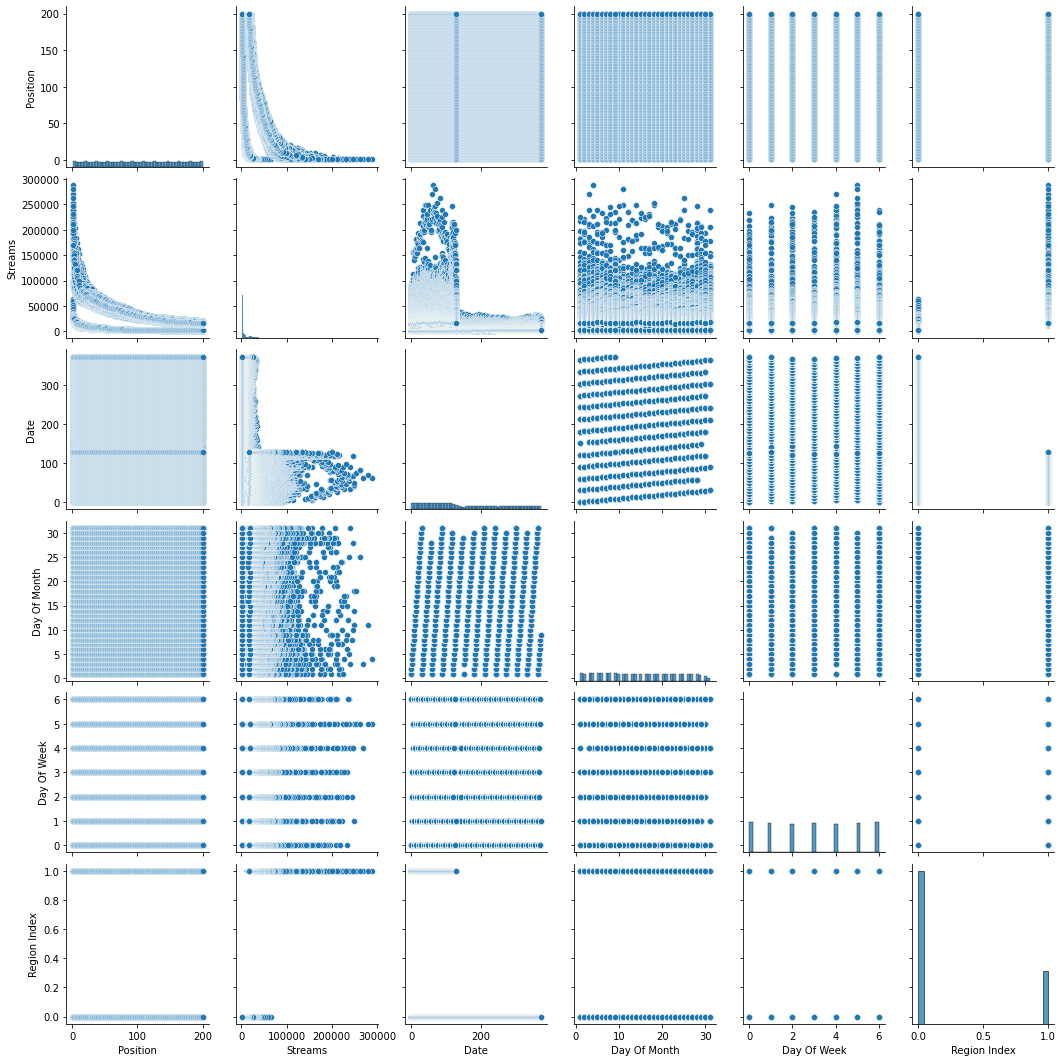

In [10]:
sns.pairplot(pairplt_data.head(100000))

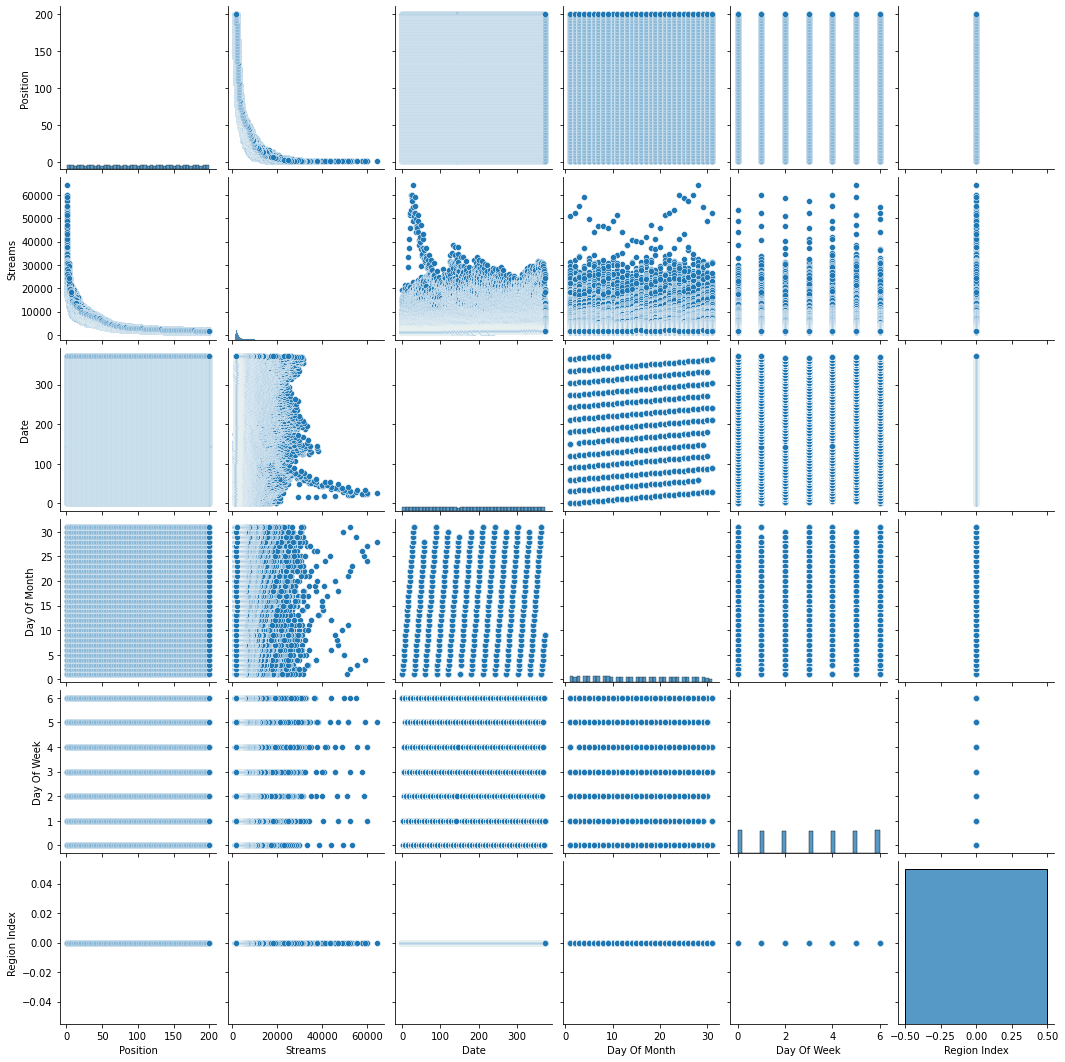

In [19]:
sns.pairplot( pairplt_data[(pairplt_data["Region Index"] == 0)] )